In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib


import seaborn as sns
from scipy.stats import chi2_contingency

In [5]:
Mush = pd.read_csv('Mushroom2.csv')
Mush = Mush[['poison','odor','bruises','spore_print_color', 'population', 'habitat']]
Mush

,poison,odor,bruises,spore_print_color,population,habitat
0,poison,pungent,bruises,black,nscattered,urban
1,enable,almond,bruises,brown,numerous,grasses
2,enable,anise,bruises,brown,numerous,meadows
3,poison,pungent,bruises,black,nscattered,urban
4,enable,none,no,brown,abundant,grasses
...,...,...,...,...,...,...
8119,enable,none,no,buff,clustered,leaves
8120,enable,none,no,buff,several,leaves
8121,enable,none,no,buff,clustered,leaves
8122,poison,fishy,no,white,several,leaves


In [6]:
# chi2_contingency << 교차표 제작 후 해당 교차표를 변수로 사용 시 카이제곱한 결과 출력
# statistic이 카이제곱 검정값, 관측 빈도와 기대 빈도 간 차이 의미 // 해당 값으로는 결론 불가능
# p-value = 본판, 0.05 보다 작다면 두 변수간의 관계가 유의미하다고 볼 수 있다. 연관성 의미
# dof = 자유도
# 4개의 요소로 이루어진 튜플형식으로 나온다. 카이제곱 검정값, pvalue, 자유도, 무슨 ... 기대 어쩌고 리스트 뭉탱이

# crosstab :  두 변수에 대한 교차표 만드는 함수 // 두 개 이상의 데이터 배열에 대한 단순 교차표를 계산
odor = pd.crosstab(Mush['odor'], Mush['poison'])
print(chi2_contingency(odor))
type(chi2_contingency(odor))

Chi2ContingencyResult(statistic=7659.726740165339, pvalue=0.0, dof=8, expected_freq=array([[ 207.18857706,  192.81142294],
       [ 207.18857706,  192.81142294],
       [  99.45051699,   92.54948301],
       [ 298.35155096,  277.64844904],
       [1118.8183161 , 1041.1816839 ],
       [  18.64697194,   17.35302806],
       [1827.40324963, 1700.59675037],
       [ 132.60068932,  123.39931068],
       [ 298.35155096,  277.64844904]]))


scipy.stats.contingency.Chi2ContingencyResult

In [7]:
def poison_chi_def(col):
    temp = pd.crosstab(Mush[col], Mush['poison'])
    temp_chi = chi2_contingency(temp)[0]
    temp_p_value = chi2_contingency(temp)[1]
    return temp_chi, temp_p_value

In [8]:
Mush.columns[1:]

Index(['odor', 'bruises', 'spore_print_color', 'population', 'habitat'], dtype='object')

In [9]:
for i in list(Mush.columns[1:]):
    print("{:<20}".format(i), end=" ")
    print(f"- '독성' {poison_chi_def(i)}")

odor                 - '독성' (7659.726740165339, 0.0)
bruises              - '독성' (2041.4156474619554, 0.0)
spore_print_color    - '독성' (4602.033170084604, 0.0)
population           - '독성' (1929.740890902809, 0.0)
habitat              - '독성' (1573.7772608252621, 0.0)


In [10]:
odor = pd.crosstab(Mush['odor'], Mush['poison'])
chi2_odor, p_odor, dof_odor, ex_odor = chi2_contingency(odor)

print(f"Odor와 Poison 간의 카이제곱 검정 결과:")
print(f"Chi2: {chi2_odor}, p-value: {p_odor}\n")

# bruises와 poison 간의 관계 분석
crosstab_bruises = pd.crosstab(Mush['bruises'], Mush['poison'])
chi2_bruises, p_bruises, dof_bruises, ex_bruises = chi2_contingency(crosstab_bruises)

print(f"Bruises와 Poison 간의 카이제곱 검정 결과:")
print(f"Chi2: {chi2_bruises}, p-value: {p_bruises}\n")

# spore_print_color와 poison 간의 관계 분석
crosstab_spore_print_color = pd.crosstab(Mush['spore_print_color'], Mush['poison'])
chi2_spore_print_color, p_spore_print_color, dof_spore_print_color, ex_spore_print_color = chi2_contingency(crosstab_spore_print_color)

print(f"Spore Print Color와 Poison 간의 카이제곱 검정 결과:")
print(f"Chi2: {chi2_spore_print_color}, p-value: {p_spore_print_color}\n")

# population과 poison 간의 관계 분석
crosstab_population = pd.crosstab(Mush['population'], Mush['poison'])
chi2_population, p_population, dof_population, ex_population = chi2_contingency(crosstab_population)

print(f"Population과 Poison 간의 카이제곱 검정 결과:")
print(f"Chi2: {chi2_population}, p-value: {p_population}\n")

# habitat와 poison 간의 관계 분석
crosstab_habitat = pd.crosstab(Mush['habitat'], Mush['poison'])
chi2_habitat, p_habitat, dof_habitat, ex_habitat = chi2_contingency(crosstab_habitat)

print(f"Habitat와 Poison 간의 카이제곱 검정 결과:")
print(f"Chi2: {chi2_habitat}, p-value: {p_habitat}\n")

Odor와 Poison 간의 카이제곱 검정 결과:
Chi2: 7659.726740165339, p-value: 0.0

Bruises와 Poison 간의 카이제곱 검정 결과:
Chi2: 2041.4156474619554, p-value: 0.0

Spore Print Color와 Poison 간의 카이제곱 검정 결과:
Chi2: 4602.033170084604, p-value: 0.0

Population과 Poison 간의 카이제곱 검정 결과:
Chi2: 1929.740890902809, p-value: 0.0

Habitat와 Poison 간의 카이제곱 검정 결과:
Chi2: 1573.7772608252621, p-value: 0.0



In [11]:
def hitmap_chi(col):
    sns.heatmap(odor, annot=True, cmap="YlGnBu")
    plt.title(f"{col}")
    plt.show()

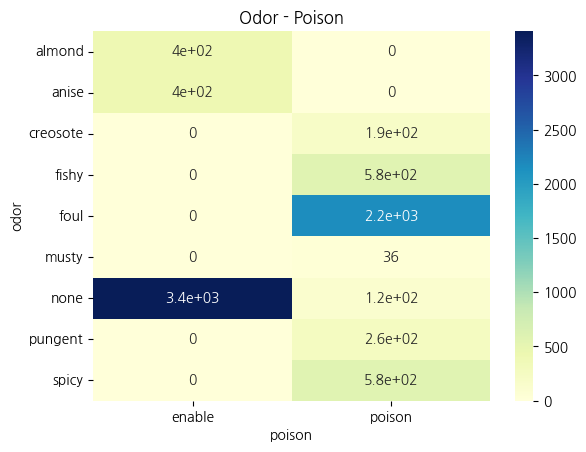

In [12]:
sns.heatmap(pd.crosstab(Mush['odor'], Mush['poison']), annot=True, cmap="YlGnBu")
plt.title("Odor - Poison")
plt.show()

# sns.heatmap(crosstab_bruises, annot=True, cmap="YlGnBu")
# plt.title("Bruises - Poison")
# plt.show()

In [13]:
def just_cross(col):
    return pd.crosstab(Mush[col], Mush['poison'])

In [14]:
print(just_cross('odor'))

poison    enable  poison
odor                    
almond       400       0
anise        400       0
creosote       0     192
fishy          0     576
foul           0    2160
musty          0      36
none        3408     120
pungent        0     256
spicy          0     576


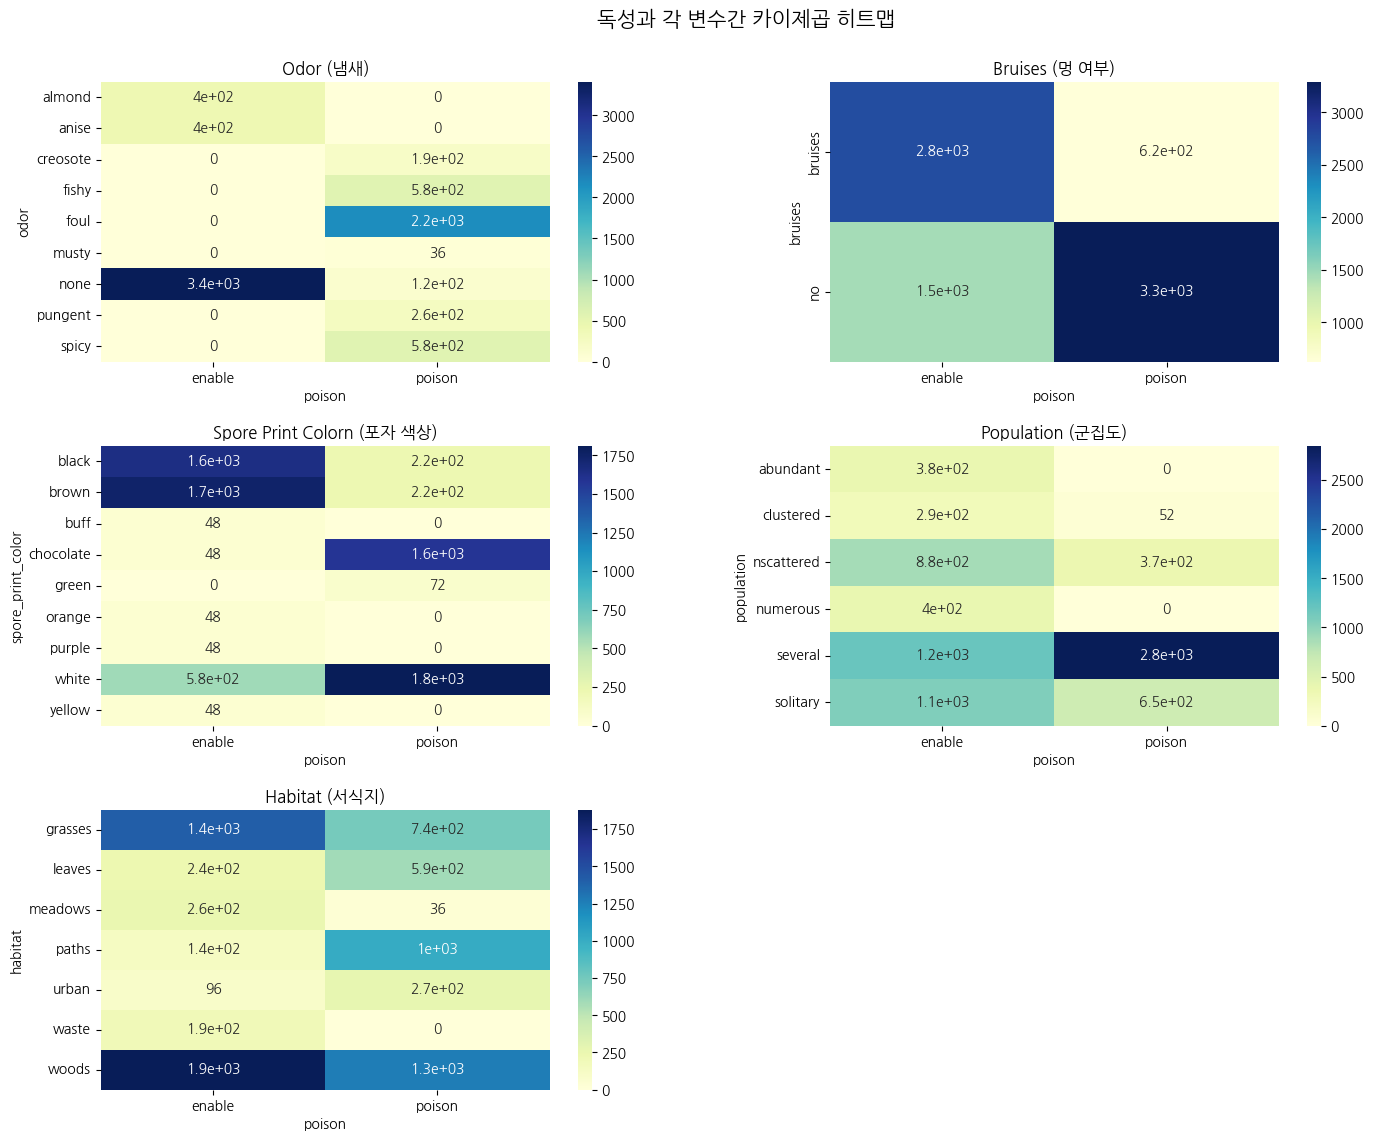

In [15]:

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
# axes.title('')
# fig.title('전체')
fig.suptitle('독성과 각 변수간 카이제곱 히트맵', fontsize = 15 )



axes[0, 0].set_title("Odor (냄새)")
axes[0, 1].set_title("Bruises (멍 여부)")
axes[1, 0].set_title("Spore Print Colorn (포자 색상)")
axes[1, 1].set_title("Population (군집도)")
axes[2, 0].set_title("Habitat (서식지)")

# idx = 0
# row = 0
# col = 0
# for i in Mush.columns[1:]:
#     sns.heatmap(just_cross(i), annot=True, cmap="YlGnBu", ax=axes[row, col])
#     idx += 1


sns.heatmap(just_cross('odor'), annot=True, cmap="YlGnBu", ax=axes[0, 0])
sns.heatmap(just_cross('bruises'), annot=True, cmap="YlGnBu", ax=axes[0, 1])
sns.heatmap(just_cross('spore_print_color'), annot=True, cmap="YlGnBu", ax=axes[1, 0])
sns.heatmap(just_cross('population'), annot=True, cmap="YlGnBu", ax=axes[1, 1])
sns.heatmap(just_cross('habitat'), annot=True, cmap="YlGnBu", ax=axes[2, 0])
fig.delaxes(axes[2, 1])

plt.subplots_adjust(left=0.07, right=0.93, top=0.92, bottom=0.08, wspace=0.3, hspace=0.3)

plt.show()